In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import glob
from collections import Counter
import spacy

In [2]:
# Get all CSV files in directory
json_files = glob.glob("data/*.csv")  # change it to the json file!!!!!!!!!!!!!!!!!!!!!!

# Print the list of CSV files with numbering
print("JSON Files:")
for i, file in enumerate(json_files, 1):
    print(f"{i}. {file}")

JSON Files:
1. data\jobs_Head_of_Product_-_European_Union_-_any_-_LinkedIn.csv
2. data\jobs_Head_of_Product_-_European_Union_-_hybrid_-_LinkedIn.csv
3. data\jobs_Head_of_Product_-_European_Union_-_Remote_-_LinkedIn(1).csv
4. data\jobs_Head_of_Product_-_European_Union_-_Remote_-_LinkedIn(2).csv
5. data\jobs_Head_of_Product_-_European_Union_-_Remote_-_LinkedIn(3).csv
6. data\jobs_Head_of_Product_-_European_Union_-_Remote_-_LinkedIn.csv


In [3]:
# Read Json files and concat to a single DF
dfs = []
for f in json_files:
    try:
        df = pd.read_csv(f)
        print(f"Read {len(df)} rows from {f}")
        dfs.append(df)
    except pd.errors.EmptyDataError:
        print(f"Warning: {f} is empty")

# Concatenate DataFrames
df = pd.concat(dfs, ignore_index=True)

Read 25 rows from data\jobs_Head_of_Product_-_European_Union_-_any_-_LinkedIn.csv
Read 25 rows from data\jobs_Head_of_Product_-_European_Union_-_hybrid_-_LinkedIn.csv
Read 25 rows from data\jobs_Head_of_Product_-_European_Union_-_Remote_-_LinkedIn.csv


In [ ]:
df.info()

In [ ]:
df.head(5)

In [ ]:
# Print the first five rows of the 'job_description' column, showing about 120 characters
display(df["job_description"].str.slice(0, 120).head(5))

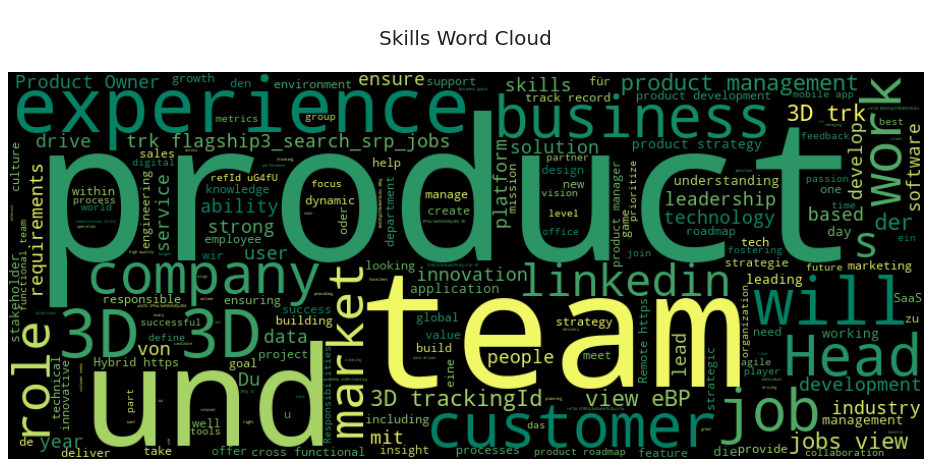

In [8]:
# Extract text from all columns and concatenate
columns_to_concat = [
    "job_title",
    "company_name",
    "location",
    "job_link",
    "job_id",
    "job_description",
]
texts = " ".join(df[columns_to_concat].astype(str).apply(lambda x: " ".join(x), axis=1))

# Generate word cloud
wordcloud = WordCloud(width=900, height=380, colormap="summer").generate(texts)

# Plot word cloud
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("\nSkills Word Cloud\n", size=18, color="#222222")
plt.axis("off")

# Set the background color of the figure to white
plt.gcf().patch.set_facecolor("white")

# Adjust layout to center the plot
plt.tight_layout()

plt.show()

In [5]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Tokenize the text
doc = nlp(texts)

# Perform frequency analysis
word_freq = Counter(token.text for token in doc)

# Display the most common words
print(word_freq.most_common())

# Display the top N most common words
top_n = 20
print(f"Top {top_n} Most Common Words:")
for word, count in word_freq.most_common(top_n):
    print(f"{word}: {count}")

[(',', 2386), ('and', 2020), ('.', 1479), ('the', 1138), ('to', 969), ('of', 952), ('-', 797), ('a', 669), ('in', 622), ('product', 565), ('with', 525), ('for', 390), ('our', 362), (':', 362), ('Product', 285), ('(', 267), ('und', 267), ('you', 236), (')', 233), ('that', 211), ('is', 204), ('on', 201), ('team', 199), ('\n', 195), ('/', 173), ('will', 167), ('are', 160), ('experience', 152), ('we', 149), ('your', 139), ('an', 135), ('development', 131), ('business', 126), ('You', 125), ('as', 124), ('or', 120), ('We', 116), ('management', 111), ('market', 110), (' ', 109), ('be', 108), ('customer', 108), ('user', 107), ('skills', 106), ('Head', 106), ('work', 106), ('teams', 105), ('der', 102), ('About', 101), ('from', 101), ('company', 101), ('at', 100), ('&', 100), ('job', 95), ('role', 95), ('data', 93), ('their', 91), ('have', 91), ('products', 88), ('working', 87), ('mit', 84), ('by', 80), ('die', 78), ("'s", 77), ('strategy', 76), ('\n            \n \n', 75), ('industry', 74), ('T

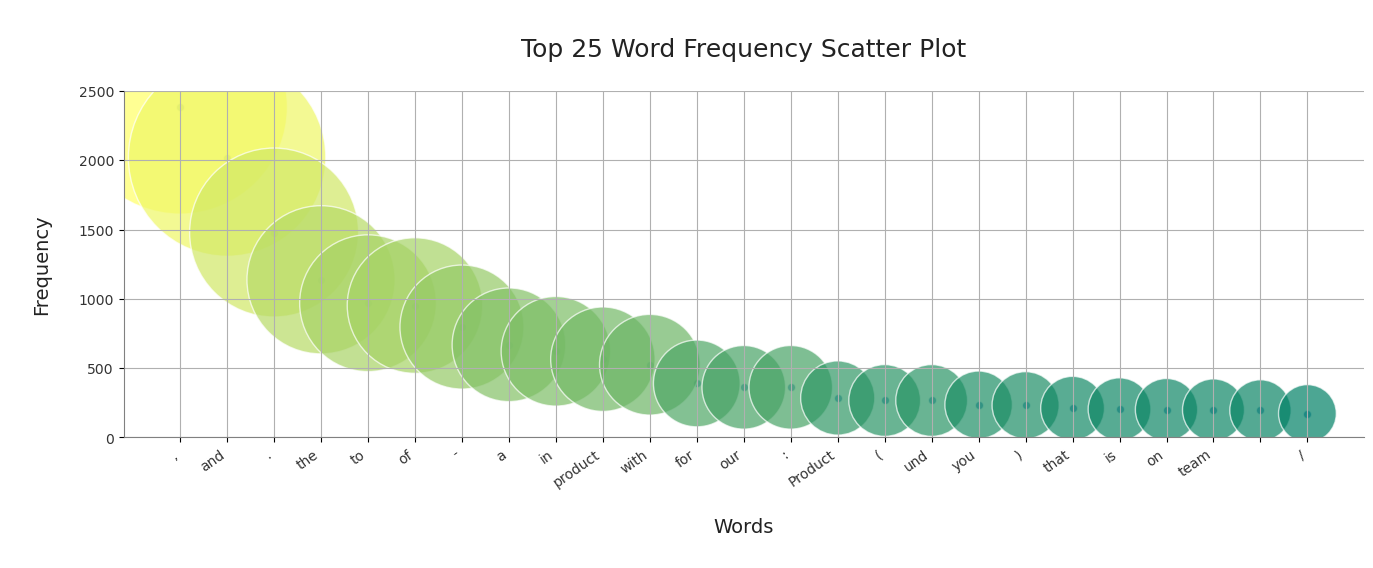

In [6]:
# Display the top N most common words
top_n = 25
top_words, top_frequencies = zip(*word_freq.most_common(top_n))

# Normalize frequencies to use as sizes for dots
sizes = [freq * 10 for freq in top_frequencies]

# Create a scatter plot
plt.figure(figsize=(16, 4.5))
ax = plt.gca()

# Set the background color of the entire figure
fig = plt.gcf()
fig.patch.set_facecolor("white")

# Plot scatter points
plt.scatter(top_words, top_frequencies, alpha=0.7, edgecolors="w", marker="o")

# Style the plot
plt.style.use("classic")
ax.grid(True)

from matplotlib.colors import LogNorm

# Create a scatter plot with different colors and sizes
scatter = ax.scatter(
    top_words,
    top_frequencies,
    c=top_frequencies,
    cmap="summer",
    s=sizes,
    alpha=0.7,
    edgecolors="w",
    marker="o",
    norm=LogNorm(),
)

# Set plot title with background color
plt.title("\nTop 25 Word Frequency Scatter Plot\n", size=18, color="#222222")

# Label the axes
plt.xlabel("\nWords\n", size=14, color="#222222")
plt.ylabel("\nFrequency\n", size=14, color="#222222")

# Rotate x-axis labels for better readability
plt.xticks(rotation=35, ha="right", color="#333333")
plt.yticks(color="#333333")

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Set the left and bottom spines to grey color
ax.spines["left"].set_color("grey")
ax.spines["bottom"].set_color("grey")

# Display the plot
plt.show()

In [7]:
import plotly.express as px

# Assuming 'df' is your DataFrame with frequency data
fig = px.scatter(
    df,
    x="Skill",
    y="Frequency",
    color="Cluster",
    size="Frequency",
    hover_data=["Reference Text"],
)

# To display the interactive plot in Jupyter Notebook or Jupyter Lab
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['job_title', 'company_name', 'location', 'job_link', 'job_id', 'job_description'] but received: Skill